In [1]:
from scipy.optimize import curve_fit
from iqtools import *
%matplotlib inline

In [2]:
#filename = '/Users/shahab/Desktop/Work_Large_Files/E127b/pgamma_lifetime_7MeV/pgamma_lifetime-2021.05.25.21.56.37.593_on.tiq'; sframes = 29500
#filename = '/Users/shahab/Desktop/Work_Large_Files/E127b/pgamma_lifetime_7MeV/pgamma_lifetime-2021.05.25.22.02.16.618_on.tiq'; sframes = 29500
#filename = '/Users/shahab/Desktop/Work_Large_Files/E127b/pgamma_lifetime_7MeV/pgamma_lifetime-2021.05.25.22.07.22.369_off.tiq'; sframes = 53500
filename = '/Users/shahab/Desktop/Work_Large_Files/E127b/pgamma_lifetime_7MeV/pgamma_lifetime-2021.05.25.22.13.24.787_off.tiq'; sframes = 34900

In [3]:
def fit_function(x, *p):
    """
    Exponential function
    """
    return p[0] + p[1] * np.exp(-x / p[2])

In [4]:
iq=get_iq_object(filename)
lframes = 1024
nframes = 12000
iq.read(nframes = nframes, lframes=lframes, sframes = sframes)

In [5]:
iq.method='fft'
xx, yy, zz = iq.get_spectrogram(nframes = nframes, lframes=lframes)

In [6]:
# make sure for the FFT you have the power not voltage spectrum
zz=zz**2

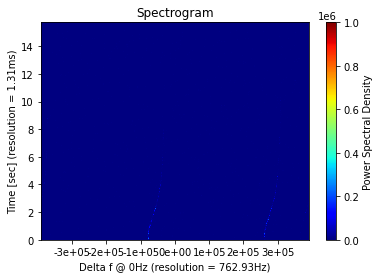

In [7]:
plot_spectrogram(xx, yy, zz)

In [8]:
xa, ya, za = get_averaged_spectrogram(xx, yy, zz, 10)

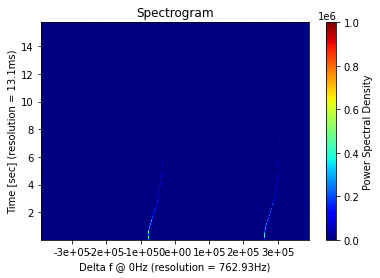

In [9]:
plot_spectrogram(xa, ya, za)

In [10]:
sl = slice(200,800)

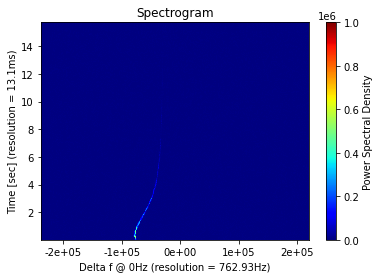

In [11]:
plot_spectrogram(xa[:, sl], ya[:, sl], za[:, sl])

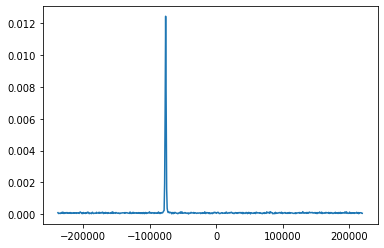

In [12]:
plt.plot(xa[50, sl], za[50, sl])

In [13]:
x, y = IQBase.get_frame_sum_vs_time(xa[:, sl], ya[:, sl], za[:, sl])
#  skip first data points
x, y = x[26:], y [26:]

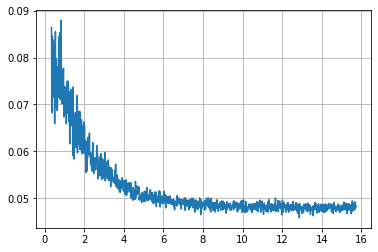

In [14]:
plt.plot(x, y)
plt.grid()

In [15]:
#p = [4.5, 0.05, 20]
p = [0.5, 0.05, 5]
popt, pcov = curve_fit(fit_function, x, y, p0=p)

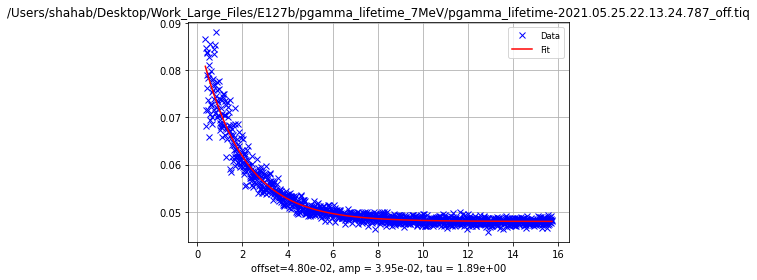

In [16]:
# plot with original data
fig = plt.figure()
ax = fig.gca()
ax.plot(x, y, 'bx', label='Data')
ax.plot(x, fit_function(x, *popt), 'r', label='Fit')
ax.set_xlabel('offset={:0.2e}, amp = {:0.2e}, tau = {:0.2e}'.format(
    popt[0], popt[1], popt[2]))
ax.set_title(filename)
ax.grid()
# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=False)

# Set legend fontsize
for label in legend.get_texts():
    label.set_fontsize('small')
plt.tight_layout()
plt.savefig(filename+'.png')

In [17]:
popt

array([0.04799479, 0.03951446, 1.89332311])

In [18]:
popt

array([0.04799479, 0.03951446, 1.89332311])

In [19]:
write_spectrum_to_root(x, y, filename = filename)